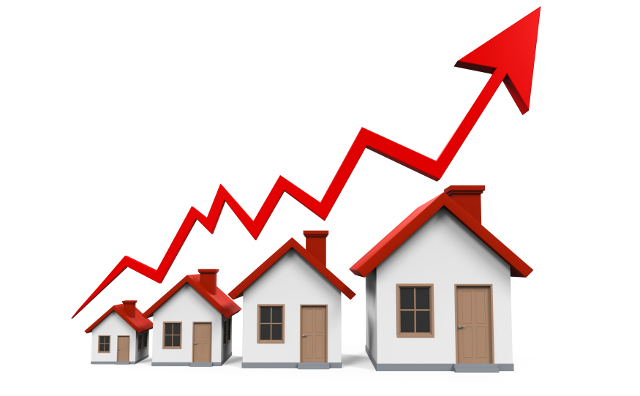

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

* [1. Libraies Loading](#1)
* [2. Data Loading](#2)
    * [2.1 Data Description](#2.1)
* [3. Exploratory Data Analysis(EDA)](#3)
    * [3.1 Pearson Correlation & Spearman Correlation](#3.1)
    * [3.2 Data Visualization](#3.2)
* [4. Feature Engineering](#4)
    * [4.1 Deleted Duplicate Data](#4.1)
    * [4.2 Reject Outlier](#4.2)
    * [4.3 Missing Values](#4.3)
    * [4.4 Handling the Missing Values](#4.4)
    * [4.5 Recheck Missing values](#4.5)
    * [4.6 Processing Categorical & Numerical Data](#4.6)
    * [4.7  Dimensionality reduction](#4.7)
    * [4.8 Standardization](#4.8)
* [5. Machine Learning model](#5)
    * [5.1 Usefull Definitions](#5.1)
    * [5.2 Model experiment](#5.2 )
* [6. Summary](#6)
        

# You can consider upvoting or comment if you think it helps you! :)

* This is a more detailed Kernel about housing price prediction. 
* It includes data visualization, feature engineering, building machine learning models to predict housing prices (Lasso, Ridge, Elastice Net, Kernel Ridge, Gradient Boosting,) and some personal insights.


# Libraies loading<a id = '1'><a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import  train_test_split

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Data loading<a id ='2'><a>

## Data description<a id = '2.1'><a>

*  SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
*  MSSubClass: The building class
* MSZoning: The general zoning classification
*  LotFrontage: Linear feet of street connected to property
*  LotArea: Lot size in square feet
*  Street: Type of road access
*  Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale



In [2]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [6]:
test_id = df_test['Id']

In [7]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
df = df_train

In [9]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# EDA<a id ='3'><a>

## Pearson correlation cofficient<a id = '3.1'><a>

In [10]:
df_train_pearson_correlation = df_train.corr(method='pearson')
fig = go.Figure(data=go.Heatmap(
                   x=df_train_pearson_correlation.columns,
                   y=df_train_pearson_correlation.index,
                   z=df_train_pearson_correlation.values,
                   name='pearson',showscale=True,xgap=1,ygap=1,
                   colorscale='Blackbody'))
fig.update_layout(height=700, width=900, title_text="<b>Pearson Correlation<b>")
fig.show()

We can roughly get some features that are highly correlated with SalePrice from this heat map. Such as OverallQual,GrLivArea,GarageArea,GarageCars,TotalBsmtSF.


But Are these accurate? Let us explore further.

In [11]:
df_train_corr = df_train.corr(method='pearson')["SalePrice"].sort_values(ascending = False)
df_train_corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

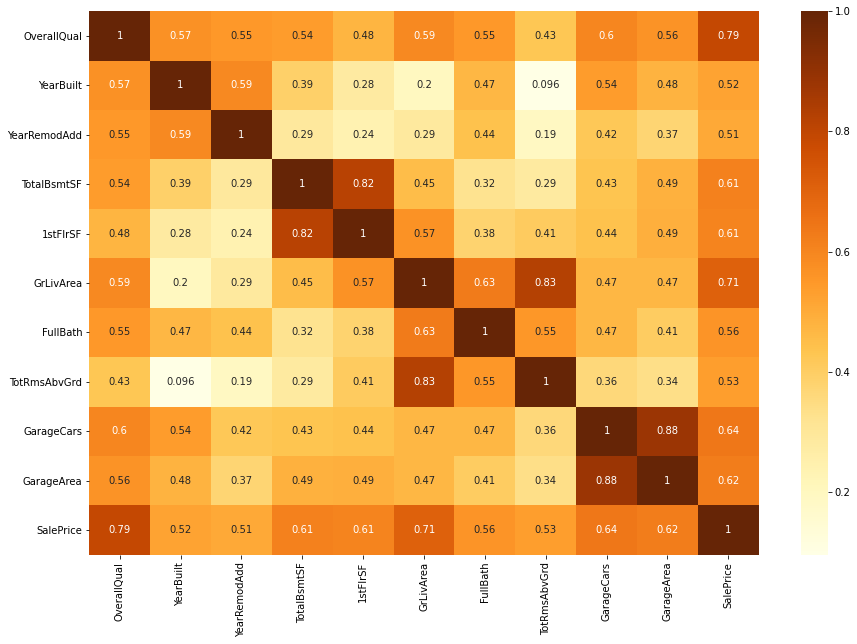

In [12]:
top_corr_features = df_train.corr(method='pearson').index[abs(df_train.corr(method='pearson')['SalePrice'])>0.5]
plt.figure(figsize=(15,10))
sns.heatmap(df[top_corr_features].corr(),annot = True,cmap='YlOrBr')
top_corr_features

We obtained these characteristics that are at least moderately relevant to SalePrice :'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
'GarageArea',

## Data visualization<a id ='3.2'><a>

### OverallQual

In [13]:
fig = px.scatter(df_train, x="OverallQual", y="SalePrice", marginal_x="histogram", marginal_y="rug")
fig.show()

In [14]:
fig = px.box(df_train, y="OverallQual")
fig.show()

### GrLivArea

In [15]:
fig = px.scatter(df_train, x="GrLivArea", y="SalePrice",marginal_x="histogram", marginal_y="rug")
fig.show()

In [16]:
fig = px.box(df_train, y="GrLivArea")
fig.show()

### GarageCars


In [17]:
fig = px.scatter(df_train, x="GarageCars", y="SalePrice",marginal_x="histogram", marginal_y="rug")
fig.show()

In [18]:
fig = px.box(df_train, y="GarageCars")
fig.show()

### GarageArea

In [19]:
fig = px.scatter(df_train, x="GarageArea", y="SalePrice",marginal_x="histogram", marginal_y="rug")
fig.show()

In [20]:
fig = px.box(df_train, y="GarageArea")
fig.show()

### TotalBsmtSF

In [21]:
fig = px.scatter(df_train, x="TotalBsmtSF", y="SalePrice",marginal_x="histogram", marginal_y="rug")
fig.show()

In [22]:
fig = px.box(df_train, y="TotalBsmtSF")
fig.show()

### FullBath

In [23]:
fig = px.scatter(df_train, x="FullBath", y="SalePrice",marginal_x="histogram", marginal_y="rug")
fig.show()

### YearBuilt

In [24]:
fig = px.scatter(df_train, x="YearBuilt", y="SalePrice",marginal_x="histogram", marginal_y="rug")
fig.show()

In [25]:
fig = px.box(df_train, y="YearBuilt")
fig.show()

### Target value(Sale Price)

In [26]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [27]:
fig = px.histogram(df_train, x="SalePrice")
fig.show()

In [28]:
fig = px.box(df_train, y="SalePrice")
fig.show()

In [29]:
"""
x = df_train['SalePrice']
fig = go.Figure(data=[go.Histogram(x=x)])
fig.show()
"""

"\nx = df_train['SalePrice']\nfig = go.Figure(data=[go.Histogram(x=x)])\nfig.show()\n"

### Skew and Kurt:

*   Skewness can be used to measure the asymmetry of the probability distribution


The range of skewness is (-∞, +∞)

When the skewness < 0, the probability distribution graph is skewed to the left.

When the skewness=0, it means that the data is relatively evenly distributed on both sides of the average value, not necessarily an absolute symmetrical distribution.

When the skewness>0, the probability distribution graph is skewed to the right


*   Kurtosis can be used to measure the steepness of the probability distribution of a random variable.

The value range of kurtosis is [1,+∞), and the kurtosis value of data that completely obeys the normal distribution is 3. The larger the kurtosis value, the sharper the probability distribution graph, the smaller the kurtosis value, and the chubby. .



In [30]:
# Skew and kurt
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


It seems that the target value has a skewness to the right, usually we want to convert it to a normal distribution, which is more conducive to the prediction of the linear model.

In [31]:
#log transform the target:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

In [32]:
fig = px.histogram(df_train, x="SalePrice")
fig.show()

# Feature engineering<a id = '4'><a>

In [33]:
#df.info()

## Deleted duplicated data <a id = '4.1'><a>

In [34]:
duplicate = df.duplicated()
print(duplicate.sum())

0


## Reject Outlier<a id = '4.2'><a>

 3 Standard Deviation 
 
The Laida criterion is to first assume that a set of test data contains only random errors, calculate and process them to obtain the standard deviation, and determine an interval with a certain probability. It is considered that any error exceeding this interval is not a random error but a gross error. Data containing this error should be eliminated.

The 3σ rule is:
*  The probability that the value is distributed in (μ-σ,μ+σ) is 0.6827
*  The probability that the value is distributed in (μ-2σ,μ+2σ) is 0.9545
*  The probability that the value is distributed in (μ-3σ,μ+3σ) is 0.9973

It can be considered that the value of Y is almost all concentrated in the (μ-3σ,μ+3σ) interval, and the possibility of exceeding this range is only less than 0.3%.

## Missing Values<a id = '4.3'><a>

Train Data & Test Data

In [35]:
df_cat = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(exclude=['object'])

In [36]:
y = df_train.SalePrice.values

In [37]:
df.drop(['SalePrice'], axis= 1,inplace= True)
df.drop(['Id'], axis= 1, inplace= True)
df_test.drop(['Id'],axis=1,inplace=True)

In [38]:
print("Train data size is : {}".format(df.shape))
print("Test data size is : {}".format(df_test.shape))

Train data size is : (1460, 79)
Test data size is : (1459, 79)


**Missing Values in Train data**

In [39]:
Missing_count = df.isna().sum().sort_values(ascending = False)[:25]
Missing_ratio = (Missing_count/len(df))*100
Missing_table = pd.concat([Missing_count,Missing_ratio],axis= 1, keys=['Missing_count','Missing_ratio'])
Missing_table 

,Missing_count,Missing_ratio
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'PoolQC'),
  Text(1, 0, 'MiscFeature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'FireplaceQu'),
  Text(5, 0, 'LotFrontage'),
  Text(6, 0, 'GarageType'),
  Text(7, 0, 'GarageYrBlt'),
  Text(8, 0, 'GarageQual'),
  Text(9, 0, 'GarageCond'),
  Text(10, 0, 'GarageFinish'),
  Text(11, 0, 'BsmtFinType2'),
  Text(12, 0, 'BsmtExposure'),
  Text(13, 0, 'BsmtCond'),
  Text(14, 0, 'BsmtFinType1'),
  Text(15, 0, 'BsmtQual'),
  Text(16, 0, 'MasVnrArea'),
  Text(17, 0, 'MasVnrType'),
  Text(18, 0, 'Electrical'),
  Text(19, 0, 'BedroomAbvGr'),
  Text(20, 0, 'BsmtHalfBath'),
  Text(21, 0, 'FullBath'),
  Text(22, 0, 'KitchenAbvGr'),
  Text(23, 0, 'HalfBath'),
  Text(24, 0, 'Functional')])

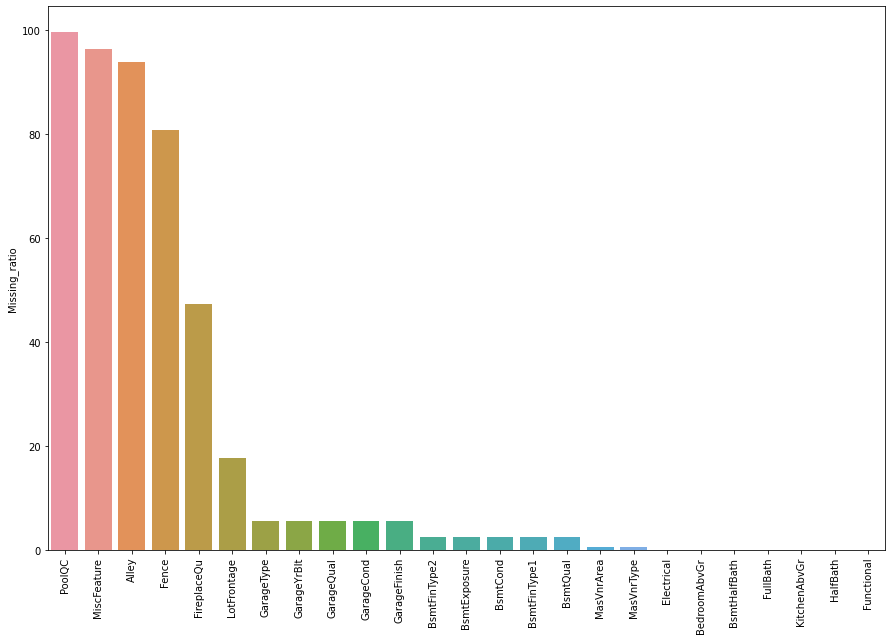

In [40]:
plt.figure(figsize=(15,10))
sns.barplot(x =Missing_table.index,y = 'Missing_ratio',data=Missing_table)
plt.xticks(rotation ='90')

**Missing Values in Test data**

In [41]:
Missing_count1 = df_test.isna().sum().sort_values(ascending = False)[:33]
Missing_ratio1 = (Missing_count1/len(df))*100
Missing_table1 = pd.concat([Missing_count1,Missing_ratio1],axis= 1, keys=['Missing_count1','Missing_ratio1'])
Missing_table1 

,Missing_count1,Missing_ratio1
PoolQC,1456,99.726027
MiscFeature,1408,96.438356
Alley,1352,92.602740
Fence,1169,80.068493
FireplaceQu,730,50.000000
LotFrontage,227,15.547945
GarageYrBlt,78,5.342466
GarageFinish,78,5.342466
GarageQual,78,5.342466
GarageCond,78,5.342466


## Handling the Missing Values<a id = '4.4'><a>

This work is just to reproduce the data analysis process of housing price prediction.
*  In real busines issues, we have to consider practical problems and customer needs.
*  In this data set, we will refer to a file named data description.txt.

### POOlQC: 
  
  Pool quality
	
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

According to the data description file, we learned that NA means there is no swimming pool.

In [42]:
df['PoolQC'] = df['PoolQC'].fillna('None')

### MiscFeature:

Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	  None

NA means No feature.

In [43]:
df['MiscFeature'] = df['MiscFeature'].fillna('None')

### Alley:

Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

NA means No alley access

In [44]:
df['Alley'] = df['Alley'].fillna('None')

### Fence:

Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

NA means No Fence.

In [45]:
df['Fence'] = df['Fence'].fillna('None')

### FireplaceQu:

Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

NA means No Fireplace.

In [46]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

### LotFrontage

LotFrontage: Linear feet of street connected to property.

'LotFrontage' is numerical column and it also has outliers, so it can be filled with median

In [47]:
df['LotFrontage']= df['LotFrontage'].fillna(df.LotFrontage.median())  

### Attributes related to Garage



GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage


GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

NA can be defined as No Garage in the above four attributes.

In [48]:
for i in ('GarageType','GarageFinish','GarageCond','GarageQual'):
  df[i] = df[i].fillna('None')

### GarageYrBlt: 
Year garage was built


In [49]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df.GarageYrBlt.mean())

In [50]:
for i in ('GarageCars','GarageArea'):
  df[i] = df[i].fillna(0)

### Attributes related of Basement






In [51]:
for i in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
  df[i] = df[i].fillna(0)

BsmtQual: Evaluates the height of the basement


       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement


BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement


BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement



BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement


NA in these categorical features related to Basement means that there is no basement.

In [52]:
for i in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
  df[i] = df[i].fillna('None')

### MasVnrType & MasVnrArea

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

NA most likely means there is no Masony for houses. 

MasVnrType has 'None' categorical value, so missing value can be filled with 'None'.

MasVnrArea filled with '0'.

In [53]:
df['MasVnrArea']= df['MasVnrArea'].fillna(0)
df['MasVnrType']= df['MasVnrType'].fillna('None')

### Electrical
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [54]:
df['Electrical'].value_counts(), df['Electrical'].mode()

(SBrkr    1334
 FuseA      94
 FuseF      27
 FuseP       3
 Mix         1
 Name: Electrical, dtype: int64,
 0    SBrkr
 dtype: object)

In [55]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')

### Process Missing value of Test Data

In [56]:
Missing_count1 = df_test.isna().sum().sort_values(ascending = False)[:33]
Missing_ratio1 = (Missing_count1/len(df))*100
Missing_table1 = pd.concat([Missing_count1,Missing_ratio1],axis= 1, keys=['Missing_count1','Missing_ratio1'])
Missing_table1 

,Missing_count1,Missing_ratio1
PoolQC,1456,99.726027
MiscFeature,1408,96.438356
Alley,1352,92.602740
Fence,1169,80.068493
FireplaceQu,730,50.000000
LotFrontage,227,15.547945
GarageYrBlt,78,5.342466
GarageFinish,78,5.342466
GarageQual,78,5.342466
GarageCond,78,5.342466


In [57]:
df_test['PoolQC'] = df_test['PoolQC'].fillna('None')

In [58]:
df_test['MiscFeature'] = df_test['MiscFeature'].fillna('None')

In [59]:
df_test['Alley'] = df_test['Alley'].fillna('None')

In [60]:
df_test['Fence'] = df_test['Fence'].fillna('None')

In [61]:
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('None')

In [62]:
df_test['LotFrontage']= df_test['LotFrontage'].fillna(df_test.LotFrontage.median())  


GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

In [63]:
for i in ('GarageType','GarageFinish','GarageCond','GarageQual'):
  df_test[i] = df_test[i].fillna('None')

In [64]:
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test.GarageYrBlt.mean())

In [65]:
for i in ('GarageCars','GarageArea'):
  df_test[i] = df_test[i].fillna(0)


BsmtFinSF1: Type 1 finished square feet

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

BsmtHalfBath: Basement half bathrooms



In [66]:
for i in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
  df_test[i] = df_test[i].fillna(0)

In [67]:
for i in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
  df_test[i] = df_test[i].fillna('None')

In [68]:
df_test['Electrical'] = df_test['Electrical'].fillna('SBrkr')

### MSZoning: 

Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

It seems that there is no explanation for NA here. Let's take a look at the mode of this feature.

In [69]:
df_test['MasVnrArea']= df_test['MasVnrArea'].fillna(0)
df_test['MasVnrType']= df_test['MasVnrType'].fillna('None')

In [70]:
df_test['MSZoning'].mode()

0    RL
dtype: object

In [71]:
df_test['MSZoning'] = df_test['MSZoning'].fillna('RL')
df_test['MSZoning'].isna().sum()

0

### Utilities: 

Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

In [72]:
df_test['Utilities'].mode()

0    AllPub
dtype: object

In [73]:
df_test['Utilities'] = df_test['Utilities'].fillna('AllPub')
df_test['MSZoning'].isna().sum()

0

### Functional

 Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [74]:
df_test['Functional'].mode()

0    Typ
dtype: object

In [75]:
df_test['Functional'] = df_test['Functional'].fillna('Typ')

In [76]:
df_test['Functional'].isna().sum()

0

### KitchenQual：

Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [77]:
df_test['KitchenQual'].value_counts(), df_test['KitchenQual'].mode()

(TA    757
 Gd    565
 Ex    105
 Fa     31
 Name: KitchenQual, dtype: int64,
 0    TA
 dtype: object)

In [78]:
df_test['KitchenQual'] = df_test['KitchenQual'].fillna('TA')

### SaleType：

 Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [79]:
df_test['SaleType'].value_counts(), df_test['SaleType'].mode()

(WD       1258
 New       117
 COD        44
 ConLD      17
 CWD         8
 Oth         4
 ConLI       4
 Con         3
 ConLw       3
 Name: SaleType, dtype: int64,
 0    WD
 dtype: object)

In [80]:
df_test['SaleType'] = df_test['SaleType'].fillna('SaleType')

### Exterior1st & Exterior2nd：

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [81]:
df_test['Exterior1st'].value_counts(), df_test['Exterior1st'].mode()

(VinylSd    510
 MetalSd    230
 HdBoard    220
 Wd Sdng    205
 Plywood    113
 CemntBd     65
 BrkFace     37
 WdShing     30
 AsbShng     24
 Stucco      18
 BrkComm      4
 AsphShn      1
 CBlock       1
 Name: Exterior1st, dtype: int64,
 0    VinylSd
 dtype: object)

In [82]:
df_test['Exterior1st'] = df_test['Exterior1st'].fillna('VinylSd')

In [83]:
df_test['Exterior2nd'].value_counts(), df_test['Exterior2nd'].mode()

(VinylSd    510
 MetalSd    233
 HdBoard    199
 Wd Sdng    194
 Plywood    128
 CmentBd     66
 Wd Shng     43
 BrkFace     22
 Stucco      21
 AsbShng     18
 Brk Cmn     15
 ImStucc      5
 CBlock       2
 AsphShn      1
 Stone        1
 Name: Exterior2nd, dtype: int64,
 0    VinylSd
 dtype: object)

In [84]:
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna('VinylSd')

**Let's check the missing value table.**
## Recheck the data for missing values<a id = '4.5'><a>

In [85]:
Missing_count = df.isna().sum().sort_values(ascending = False)[:3]
Missing_ratio = (Missing_count/len(df))*100
Missing_table = pd.concat([Missing_count,Missing_ratio],axis= 1, keys=['Missing_count','Missing_ratio'])
Missing_table

,Missing_count,Missing_ratio
MSSubClass,0,0.0
BedroomAbvGr,0,0.0
GarageType,0,0.0


In [86]:
Missing_count1 = df_test.isna().sum().sort_values(ascending = False)[:3]
Missing_ratio1 = (Missing_count1/len(df))*100
Missing_table1 = pd.concat([Missing_count1,Missing_ratio1],axis= 1, keys=['Missing_count1','Missing_ratio1'])
Missing_table1 

,Missing_count1,Missing_ratio1
MSSubClass,0,0.0
BedroomAbvGr,0,0.0
GarageType,0,0.0


**Congratulations for completing the most time-consuming part！！！**

## Processing Categorical & Numerical Data<a id = '4.6'><a>

### Numercial data 

Fix Skewed feature

In [87]:
from scipy.stats import skew

**Skewness of Train data**

In [88]:
df_cat = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(exclude=['object'])

In [89]:
df_num_skewness = df_num.apply(lambda x:skew(x))

In [90]:
skewness = pd.DataFrame({'Skew':df_num_skewness.sort_values(ascending=False)})
skewness

,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


In [91]:
skewness = skewness[abs(df_num_skewness)>0.5]
skewness

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


In [92]:
df_num[skewness.index] = np.log1p(df_num[skewness.index])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
df_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,4.110874,4.189655,9.042040,7,1.791759,7.602900,7.602900,5.283204,6.561031,0.000000,...,548,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,2,2008
1,3.044522,4.394449,9.169623,6,2.197225,7.589336,7.589336,0.000000,6.886532,0.000000,...,460,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,5,2007
2,4.110874,4.234107,9.328212,7,1.791759,7.601902,7.602401,5.093750,6.188264,0.000000,...,608,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,9,2008
3,4.262680,4.110874,9.164401,7,1.791759,7.557995,7.586296,0.000000,5.379897,0.000000,...,642,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,2,2006
4,4.110874,4.442651,9.565284,8,1.791759,7.601402,7.601402,5.860786,6.486161,0.000000,...,836,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,6,1.791759,7.600902,7.601402,0.000000,0.000000,0.000000,...,460,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,8,2007
1456,3.044522,4.454347,9.486152,6,1.945910,7.590347,7.595387,4.787492,6.673298,5.099866,...,500,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,2,2010
1457,4.262680,4.204693,9.109746,7,2.302585,7.571474,7.604396,0.000000,5.620401,0.000000,...,252,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,5,2010
1458,3.044522,4.234107,9.181735,5,1.945910,7.576097,7.599401,0.000000,3.912023,6.937314,...,240,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000,4,2010


**Skewness of Test Data**

In [94]:
df_cat_test = df_test.select_dtypes(include=['object'])
df_num_test = df_test.select_dtypes(exclude=['object'])
df_num__test_skewness = df_num_test.apply(lambda x:skew(x))

In [95]:
skewness_test = pd.DataFrame({'Skew':df_num__test_skewness.sort_values(ascending=False)})

In [96]:
skewness_test = skewness[abs(df_num__test_skewness)>0.5]
skewness_test
df_num_test[skewness.index] = np.log1p(df_num_test[skewness.index])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
df_num_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,3.044522,4.394449,9.360741,5,1.945910,7.581720,7.581720,0.000000,6.150603,4.976734,...,730.0,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,6,2010
1,3.044522,4.406719,9.565775,6,1.945910,7.580189,7.580189,4.691348,6.828712,0.000000,...,312.0,5.976351,3.610918,0.0,0.0,0.000000,0.0,9.433564,6,2010
2,4.110874,4.317488,9.534668,5,1.791759,7.599902,7.600402,0.000000,6.674561,0.000000,...,482.0,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,3,2010
3,4.110874,4.369448,9.208238,6,1.945910,7.600402,7.600402,3.044522,6.401917,0.000000,...,470.0,5.888878,3.610918,0.0,0.0,0.000000,0.0,0.000000,6,2010
4,4.795791,3.784190,8.518392,8,1.791759,7.597396,7.597396,0.000000,5.575949,0.000000,...,506.0,0.000000,4.418841,0.0,0.0,4.976734,0.0,0.000000,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,3.091042,7.568896,4,2.079442,7.586296,7.586296,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,6,2006
1455,5.081404,3.091042,7.546974,4,1.791759,7.586296,7.586296,0.000000,5.533389,0.000000,...,286.0,0.000000,3.218876,0.0,0.0,0.000000,0.0,0.000000,4,2006
1456,3.044522,5.081404,9.903538,5,2.079442,7.581210,7.599401,0.000000,7.110696,0.000000,...,576.0,6.163315,0.000000,0.0,0.0,0.000000,0.0,0.000000,9,2006
1457,4.454347,4.143135,9.253591,5,1.791759,7.597396,7.597396,0.000000,5.823046,0.000000,...,0.0,4.394449,3.496508,0.0,0.0,0.000000,0.0,6.552508,7,2006


### Categorical Data

Convert categorical features into numerical.

In fact, there is a more detailed way here is that we should consider the order of some features in categorical data. We should perform label encoder on these categorical data with order instead of one-hot encoder or dummy variables. 

This path can be used as a plan to optimize the model.


**Categorical Train Data**

In [98]:
df_cat = pd.get_dummies(df_cat)

In [99]:
df_cat

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [100]:
df = pd.concat([df_cat,df_num],axis= 1)

In [101]:
df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,0,1,0,0,1,0,1,0,...,548,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,2,2008
1,0,0,0,1,0,0,1,0,1,0,...,460,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,5,2007
2,0,0,0,1,0,0,1,0,1,0,...,608,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,9,2008
3,0,0,0,1,0,0,1,0,1,0,...,642,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,2,2006
4,0,0,0,1,0,0,1,0,1,0,...,836,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,1,0,...,460,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,8,2007
1456,0,0,0,1,0,0,1,0,1,0,...,500,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,2,2010
1457,0,0,0,1,0,0,1,0,1,0,...,252,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,5,2010
1458,0,0,0,1,0,0,1,0,1,0,...,240,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000,4,2010


**Categorcial  Test data**

In [102]:
df_cat_test = pd.get_dummies(df_cat_test)

In [103]:
df_cat_test

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,...,SaleType_New,SaleType_Oth,SaleType_SaleType,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1455,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1456,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1457,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [104]:
df_test = pd.concat([df_cat_test,df_num_test],axis= 1)

## Dimensionality reduction<a id = '4.7'><a>

> Dimensionality reduction is a very challenging task.
In the real world, we are often exposed to data sets with more than 1,000 or even 10,000 llion features.
Having so many variables is an advantage-the larger the amount of data, the more credible the results of the analysis.
But at the same time we may not be able to start.


> When using a data set with a large number of features for data analysis, dimensionality reduction of the data is a way to improve the performance of the model.
* 
Here is only my personal ideas to reduce the dimensionality of the data:
1.  Missing value ratio: If there are too many missing values ​​in the data set, we can use this method to reduce the number of variables.
2.  Low variance filtering: This method can identify and delete constant variables from the data set. Variables with small variance have little effect on the target variable, so you can safely delete it.
2.  High correlation filtering: A pair of variables with high correlation will increase the multicollinearity in the data set, so it is necessary to delete one of them in this way.
4.  Random Forest: This is one of the most commonly used dimensionality reduction methods, it will clearly calculate the importance of each feature in the data set.
5.  Forward feature selection and reverse feature elimination: These two methods are time-consuming and computationally expensive, so they are only suitable for data sets with fewer input variables.
6.  Factor analysis: This method is suitable for situations where there are highly correlated variable sets in the data set.
7.  PCA: This is one of the most widely used techniques for processing linear data.
8.  ICA: We can use ICA to convert data into independent components and use fewer components to describe the data.
9.  ISOMAP: Suitable for non-linear data processing.
10.  t-SNE: It is also suitable for non-linear data processing. Compared with the previous method, the visualization of this method is more direct.
11.  UMAP: Suitable for high-dimensional data. Compared with t-SNE, this method is faster.

## Standardization<a id ='4.8'><a>

In [105]:
SC = StandardScaler()

# Machine Learning model<a id = '5'><a>

In [106]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [107]:
X = df

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [109]:
X_train = SC.fit_transform(X_train)
X_test = SC.fit_transform(X_test)
df_test = SC.fit_transform(df_test)

## Usefull Definitions<a id = '5.1'><a>

### Define GridSearchCV for Lasso Regression,Ridge Regression

In [110]:
from sklearn.model_selection import KFold

# Define GridSearchCV for Lasso,Ridge
def fit_model(Model,X,y):
    
    cross_validator = KFold(n_splits=10,shuffle=True)    #K=10 Cross-validation
    
    regressor = Model()
    
    parameters = {'alpha': np.arange(0.01, 200)}
    
    scoring='r2'
    
    grid = GridSearchCV(estimator = regressor,
                        param_grid = parameters,
                        scoring = scoring,
                        verbose = 0,
                        cv = cross_validator)
    
    grid = grid.fit(X,y)    #GridsearchCV

    print(
        'The best parameters are {} with a R2 score of {:0.2f}.'.format(
            grid.best_params_, grid.best_score_))
    
    return grid.best_estimator_    # return best model after GridSearch


###  Define GridSearchCV for Elastic Net Regression

In [111]:
def fit_ENet(X,y):
    
    cross_validator = KFold(n_splits=10,shuffle=True)    #K=10 Cross-validation
    
    regressor = ElasticNet(random_state=3)
    
    parameters = {'alpha': [0.001,0.01,0.1,1,10,100],
                  'l1_ratio': np.arange(0.0, 1.0, 0.1)
    
    }
    
    scoring='r2'
    
    grid = GridSearchCV(estimator = regressor,
                        param_grid = parameters,
                        scoring = scoring,
                        cv = cross_validator,
                        verbose = 0
                        )
    
    grid = grid.fit(X,y)    #GridsearchCV

    print(
        'The best parameters are {} with a R2 score of {:0.2f}.'.format(
            grid.best_params_, grid.best_score_))
    
    return grid.best_estimator_    # return best model after GridSearch


### Define GridSearchCV for Kernel Ridge Regression

In [112]:
def fit_KRR(X,y):
    
    cross_validator = KFold(n_splits=10,shuffle=True)    #K=10 Cross-validation
    
    regressor = KernelRidge(kernel= 'polynomial',degree=2,coef0=2.5) 

    parameters = {'alpha': [0.001,0.01,0.1,1,10,100]
              
    }

    scoring='r2'
    
   
    grid = GridSearchCV(estimator = regressor,
                        param_grid = parameters,
                        scoring = scoring,
                        verbose = 0,
                        cv = cross_validator
                        )
    
    grid = grid.fit(X,y)    #GridsearchCV

    print(
        'The best parameters are {} with a R2 score of {:0.2f}.'.format(
            grid.best_params_, grid.best_score_))
    
    return grid.best_estimator_    # return best model after GridSearch


### Define GridSearchCV for Gradient Boosting Regression

In [113]:
def fit_GBoost(X,y):
    
    cross_validator = KFold(n_splits=10,shuffle=True)    #K=10 Cross-validation
    
    regressor = GradientBoostingRegressor(
                                         learning_rate = 0.05,
                                         max_depth=4, max_features='sqrt',
                                         min_samples_leaf=15, min_samples_split=10, 
                                         loss='huber', random_state =5)

    parameters = {'n_estimators':[100,500,1000,2000,3000]}


    grid = GridSearchCV(estimator = regressor,
                        param_grid = parameters,
                        scoring = 'r2',
                        cv = cross_validator,
                        verbose =0 
                        )
    
    grid = grid.fit(X,y)    #GridsearchCV

    print(
        'The best parameters are {} with a R2 score of {:0.2f}.'.format(
            grid.best_params_, grid.best_score_))
    
    return grid.best_estimator_    # return best model after GridSearch


### Define Evaluation

In [114]:
def Evaluation(model):
  Y_pred_model = model.predict(X_test)
  model_RMSE = mean_squared_error(y_test , Y_pred_model,squared = False)
  model_R2 = r2_score(y_test, Y_pred_model)
  print("RMSE    : ",model_RMSE)
  print('R2 SCORE: ',model_R2)

### Define Cross-Validation

In [115]:
def cross_val_score_MSE(model):
  model_MSE = cross_val_score(model,X_train,y_train,cv = 10, scoring = 'neg_mean_squared_error')
  return(model_MSE)
def cross_val_score_R2(model):
  model_R2= cross_val_score_R2 = cross_val_score(model,X_train,y_train,cv = 10, scoring = 'r2')
  return(model_R2)

### Lasso Regression

In [116]:
Lasso_optima = fit_model(Lasso,X_train,y_train)   

The best parameters are {'alpha': 0.01} with a R2 score of 0.90.


In [117]:
Evaluation(Lasso_optima)

RMSE    :  0.13860923912282808
R2 SCORE:  0.8815899703051046


In [118]:
score = cross_val_score_MSE(Lasso_optima)
print('K=10 CV_MSE of Lasso Regression:',format(-score.mean()))
score = cross_val_score_R2(Lasso_optima)
print('K=10 CV_R2 of Lasso Regression:',score.mean())

K=10 CV_MSE of Lasso Regression: 0.01618332240533083
K=10 CV_R2 of Lasso Regression: 0.8951018865209956


### Ridge Regreesion

In [119]:
Ridge_optima = fit_model(Ridge,X_train,y_train)   

The best parameters are {'alpha': 199.01} with a R2 score of 0.87.


In [120]:
Evaluation(Ridge_optima)

RMSE    :  0.1334482362908284
R2 SCORE:  0.89024361165716


**Cross-validation on Ridge**

In [121]:
score = cross_val_score_MSE(Ridge_optima)
print('K=10 CV_MSE of Ridge Regression:',format(-score.mean()))
score = cross_val_score_R2(Ridge_optima)
print('K=10 CV_R2 of Ridge Regression:',score.mean())

K=10 CV_MSE of Ridge Regression: 0.018499552754463043
K=10 CV_R2 of Ridge Regression: 0.8807339266288554


### Elastic Net Regression

In [122]:
 ENet_optima = fit_ENet(X_train,y_train) 
 #The best parameters are {'alpha': 0.01, 'l1_ratio': 0.5} with a R2 score of 0.90.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8279906498620972, tolerance: 0.01347654809883307

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4578257971000452, tolerance: 0.013771758851274735

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8442391305137966, tolerance: 0.014454676493092525

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.733619816042975, tolerance: 

The best parameters are {'alpha': 0.01, 'l1_ratio': 0.6000000000000001} with a R2 score of 0.89.


In [123]:
Evaluation(ENet_optima)

RMSE    :  0.1322684109573482
R2 SCORE:  0.8921757606466525


**Cross-Validation ENet regression**

In [124]:
score = cross_val_score_MSE(ENet_optima)
print('K=10 CV_MSE of Elastic Net Regression:',format(-score.mean()))
score = cross_val_score_R2(ENet_optima)
print('K=10 CV_R2 of Elastic Net Regression:',score.mean())

K=10 CV_MSE of Elastic Net Regression: 0.015408223354854544
K=10 CV_R2 of Elastic Net Regression: 0.8997052608648204


### Kernel Ridge Regression

In [125]:
KRR_optima = fit_KRR(X_train,y_train)

The best parameters are {'alpha': 1} with a R2 score of 0.88.


In [126]:
Evaluation(KRR_optima)

RMSE    :  0.13141002941100596
R2 SCORE:  0.8935707121995766


In [127]:
score = cross_val_score_MSE(KRR_optima)
print('K=10 CV_MSE of Kernel Ridge Regression:',format(-score.mean()))
score = cross_val_score_R2(KRR_optima)
print('K=10 CV_R2 of Kernel Ridge Regression:',score.mean())

K=10 CV_MSE of Kernel Ridge Regression: 0.018094334177747334
K=10 CV_R2 of Kernel Ridge Regression: 0.8830979928007572


### GradientBoosting Regression

In [128]:
GBoost_optima = fit_GBoost(X_train,y_train)

The best parameters are {'n_estimators': 1000} with a R2 score of 0.91.


In [129]:
Evaluation(GBoost_optima)

RMSE    :  0.13670446053239976
R2 SCORE:  0.8848220082768009


In [130]:
score = cross_val_score_MSE(GBoost_optima)
print('K=10 CV_MSE of Gradient Boosting Regression:',format(-score.mean()))
score = cross_val_score_R2(GBoost_optima)
print('K=10 CV_R2 of Gradient Boosting Regression:',score.mean())

K=10 CV_MSE of Gradient Boosting Regression: 0.015149853075758002
K=10 CV_R2 of Gradient Boosting Regression: 0.9018323967806324


### Xgboost Regression

In [131]:
model_XGB = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = -1)

In [132]:
XGB_REG=model_XGB.fit(X_train,y_train)

In [133]:
Evaluation(XGB_REG)

RMSE    :  0.12968181602288403
R2 SCORE:  0.8963516725956844


In [134]:
score = cross_val_score_MSE(XGB_REG)
print('K=10 CV_MSE of XGBoosting Regression:',format(-score.mean()))
score = cross_val_score_R2(XGB_REG)
print('K=10 CV_R2 of XGBoosting Regression:',score.mean())

K=10 CV_MSE of XGBoosting Regression: 0.01580392384748725
K=10 CV_R2 of XGBoosting Regression: 0.8979604548897964


### LightGBM Regression

In [135]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [136]:
LGB_REG = model_lgb.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [137]:
Evaluation(LGB_REG)

RMSE    :  0.13243412800803153
R2 SCORE:  0.8919054087421214


In [138]:
score = cross_val_score_MSE(LGB_REG)
print('K=10 CV_MSE of Light Gradient Boosting Machine Regression:',format(-score.mean()))
score = cross_val_score_R2(LGB_REG)
print('K=10 CV_R2 of Light Gradient Boosting Machine Regression:',score.mean())

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6

# Summary <a id = '6'><a>

K=10 CV_MSE of Lasso Regression: 0.01618332240533083
K=10 CV_R2 of Lasso Regression: 0.8951018865209956.


K=10 CV_MSE of Ridge Regression: 0.01849955275446303
K=10 CV_R2 of Ridge Regression: 0.8807339266288556

K=10 CV_MSE of Elastic Net Regression: 0.015492391396611732
K=10 CV_R2 of Elastic Net Regression: 0.8991384853550078

K=10 CV_MSE of Kernel Ridge Regression: 0.018094334177747293
K=10 CV_R2 of Kernel Ridge Regression: 0.8830979928007576


K=10 CV_MSE of Gradient Boosting Regression: 0.015149853075758002
K=10 CV_R2 of Gradient Boosting Regression: 0.9018323967806324


K=10 CV_MSE of XGBoosting Regression: 0.015803929014916507
K=10 CV_R2 of XGBoosting Regression: 0.8979604122359705

K=10 CV_MSE of Light Gradient Boosting Machine Regression: 0.01612564604224234
K=10 CV_R2 of Light Gradient Boosting Machine Regression: 0.8952509674644556

In [139]:
model_col = ['Lasso Regression','Ridge Regression','Elastic Net Regression',
             'Kernel Ridge Regression','Gradient Boosting Regression',
             'XGBoost Regression','LightGBM Regression']

model_MSE = [0.0161,0.0184,0.0154,0.0180,0.0151,0.0158,0.0158]

model_R2 = [0.895,0.880,0.899,0.883,0.901,0.897,0.897]

Final_CV_result = pd.DataFrame(model_col,columns= ['Regressor'])
Final_CV_result['RMSE_mean'] = model_MSE
Final_CV_result['R2_mean'] = model_R2

In [140]:
Final_CV_result

,Regressor,RMSE_mean,R2_mean
0,Lasso Regression,0.0161,0.895
1,Ridge Regression,0.0184,0.880
2,Elastic Net Regression,0.0154,0.899
3,Kernel Ridge Regression,0.0180,0.883
4,Gradient Boosting Regression,0.0151,0.901
5,XGBoost Regression,0.0158,0.897
6,LightGBM Regression,0.0158,0.897


1. The R2_mean  of all models is close to 0.9, 
2. The RMSE_mean of all models is between [0.015-0.018].

But the R2_mean of **Gradient Boosting Regressor** is slightly higher than other models.

## What can be imporved

**Version 1**
1. Reject Outlier
3. GridSearchCV on XGBoosting and LightGBM
4. Stacked Regression(Competition Killer)
5. Fix missing values and submit.